In [97]:
import pandas as pd

data = pd.read_csv("./HeartDiseaseData.csv")
data.head(10)

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary
5,6,6,32,female,atypical angina,105.0,198.0,False,normal,165.0,no,0.0,0,Hungary
6,7,7,32,male,atypical angina,110.0,225.0,False,normal,184.0,no,0.0,0,Hungary
7,8,8,32,male,atypical angina,125.0,254.0,False,normal,155.0,no,0.0,0,Hungary
8,9,9,33,male,non-anginal pain,120.0,298.0,False,normal,185.0,no,0.0,0,Hungary
9,10,10,34,female,atypical angina,130.0,161.0,False,normal,190.0,no,0.0,0,Hungary


In [98]:
#Drop useless columns: Unnamed and ID

data = data.drop(["Unnamed: 0", "ID"], axis = 1)
data.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [99]:
#Let's calculate some statistics

data.shape

(457, 12)

In [100]:
data.describe()

,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [101]:
data.dtypes

Age           int64
Sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
num           int64
Place        object
dtype: object

In [102]:
#Count null values in given dataset

data.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
Place        0
dtype: int64

In [103]:
#Replace them by mean value of all data for particular column (except for 'restecg' and 'exang')

data = data.fillna({'trestbps':data['trestbps'].median(), \
                   'chol':data['chol'].median(), \
                   'fbs':data['fbs'].median(),\
                   'thalach':data['thalach'].median(),
                   'oldpeak':data['oldpeak'].median()})
data.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,29,male,atypical angina,140.0,220.0,False,normal,170.0,no,0.0,0,Hungary
3,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [104]:
#Modify categorical variables by using pd.get_dummies

data = pd.get_dummies(data)

data.head()

,Age,trestbps,chol,thalach,oldpeak,num,Sex_female,Sex_male,cp_asymptomatic,cp_atypical angina,...,fbs_False,fbs_True,restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV,restecg_normal,restecg_showing probable or definite left ventricular hypertrophy by Estes criteria,exang_no,exang_yes,Place_Hungary,Place_Switzerland,Place_VA
0,28,130.0,132.0,185.0,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,1,0,0
1,29,120.0,243.0,160.0,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,29,140.0,220.0,170.0,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
3,30,170.0,237.0,170.0,0.0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,31,100.0,219.0,150.0,0.0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0


In [105]:
#Let's start doing some ML

from sklearn import tree

y = data.num

X = data.drop('num', axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
clf.score(X, y)

1.0

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
clf.score(X_train, y_train)

1.0

In [109]:
clf.score(X_test, y_test)

0.7246376811594203

In [110]:
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()

for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    classifier_score_data = classifier_score_data.append(pd.DataFrame({'test_score': [test_score],
                                                                       'train_score': [train_score],
                                                                       'max_dept': [max_dept]}))
classifier_score_data.head(10)


,max_dept,test_score,train_score
0,1,0.746377,0.755486
0,2,0.739130,0.768025
0,3,0.760870,0.780564
0,4,0.746377,0.827586
0,5,0.746377,0.843260
0,6,0.782609,0.896552
0,7,0.746377,0.940439
0,8,0.746377,0.962382
0,9,0.724638,0.984326
0,10,0.753623,0.993730


In [111]:
classifier_score_data.loc[(classifier_score_data.train_score == 1)].sort_values(by=['test_score'], ascending=False).head()

,max_dept,test_score,train_score
0,46,0.775362,1.0
0,26,0.760870,1.0
0,44,0.760870,1.0
0,20,0.760870,1.0
0,15,0.753623,1.0


In [112]:
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')

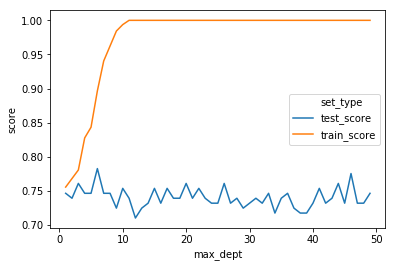

In [113]:
import seaborn as sb
ax = sb.lineplot(x="max_dept", y="score",
                  hue="set_type", data=classifier_score_data)

In [114]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores.mean()


0.6834325396825397